In [401]:
# Importing modules that will be used in this notebook
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data

## Loading the First Dataset

In [402]:
# reading in data from using pandas read_csv function
from pandas import DataFrame


charity_df = pd.read_csv('https://www.irs.gov/pub/irs-soi/eo_ky.csv')

# displaying the top 5 rows of the newly created comparsion_df DataFrame to ensure it was loaded correctly
charity_df.head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
0,10356732,CARRIAGE MUSEUM OF AMERICA,NaN,4075 IRON WORKS PKWY,LEXINGTON,KY,40511-8483,0,3,3,...,6,3,1,0,12,1476492.0,58555.0,57604.0,A540,AT THE KENTUCKY HORSE PARK
1,10551398,HIGHLANDS BAND ASSOCIATION INC,% STANLEY ROSS,PO BOX 75029,FORT THOMAS,KY,41075-0029,0,3,3,...,0,0,2,0,5,0.0,0.0,0.0,N60,NaN
2,10554843,JEFFERSON COUNTY SEARCH DOG ASSOCIATION,% HOLLY HATFIELD,8004 SMYRNA PKWY,LOUISVILLE,KY,40228-1808,0,3,3,...,0,0,2,0,12,0.0,0.0,0.0,P80,NaN
3,10557144,AUGUSTA ART GUILD,% PRESIDENT,116 MAIN ST,AUGUSTA,KY,41002-1035,0,3,3,...,0,0,2,0,12,0.0,0.0,0.0,A40,NaN
4,10557631,KENTUCKY ALPACA ASSOCIATION INC,%MARTHA SANDERS,134 N LUCAS RD,GLASGOW,KY,42141-8778,0,5,3,...,0,0,2,0,12,0.0,0.0,0.0,K26,KY CLASSIC ALPACA SHOW


In [403]:
charity_df.dtypes

EIN                   int64
NAME                 object
ICO                  object
STREET               object
CITY                 object
STATE                object
ZIP                  object
GROUP                 int64
SUBSECTION            int64
AFFILIATION           int64
CLASSIFICATION        int64
RULING                int64
DEDUCTIBILITY         int64
FOUNDATION            int64
ACTIVITY              int64
ORGANIZATION          int64
STATUS                int64
TAX_PERIOD          float64
ASSET_CD              int64
INCOME_CD             int64
FILING_REQ_CD         int64
PF_FILING_REQ_CD      int64
ACCT_PD               int64
ASSET_AMT           float64
INCOME_AMT          float64
REVENUE_AMT         float64
NTEE_CD              object
SORT_NAME            object
dtype: object

## Loading the Second Dataset

In [404]:
income_df = pd.read_csv('Household_Income_by_Zip.csv')
income_df.head()

,GEO_ID,NAME,S1901_C01_001E,S1901_C01_012E,S1901_C01_013E
0,Geography,Geographic Area Name,Estimate!!Households!!Total,Estimate!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars)
1,8600000US38079,ZCTA5 38079,1311,32629,54397
2,8600000US40003,ZCTA5 40003,749,78068,84259
3,8600000US40004,ZCTA5 40004,11732,61974,76107
4,8600000US40006,ZCTA5 40006,1675,61838,67429


# Cleaning the Data

## Cleaning the First Dataset

In [405]:
# dropping the columns I will not need for this project
from dataclasses import replace


charity_df = charity_df.drop(['ICO', 'ORGANIZATION', "SUBSECTION", "CLASSIFICATION", "PF_FILING_REQ_CD","FILING_REQ_CD", "ASSET_CD", "INCOME_CD"], axis=1)

#changing the Ruling Date column to a date
charity_df['RULING'] = pd.to_datetime(charity_df['RULING'], format='%Y%m', errors='coerce')

In [406]:
# adding a column for NTEE Common Codes using the column of specific NTEE Code
charity_df['NTEE_COMMON_CODE'] = charity_df.NTEE_CD.str[:1]

# Replacing the NTEE codes with the code description

# Making a dictionary of the NTEE Common Codes and their descriptions
Common_Codes = {
    "A" : "Arts & Culture",
    "B" : "Education",
    "C" : "Environment",
    "D" : "Animals",
    "E" : "Health",
    "F" : "Mental Health",
    "G" : "Diseases & Disorders",
    "H" : "Medical Research",
    "I" : "Legal Related",
    "J" : "Job Related",
    "K" : "Food & Nutrition",
    "L" : "Housing & Shelter",
    "M" : "Public Safety & Disaster Relief",
    "N" : "Sports & Leisure",
    "O" : "Youth Development",
    "P" : "Human Services",
    "Q" : "Foreign Affairs",
    "R" : "Civil Rights",
    "S" : "Community Improvement",
    "T" : "Philanthropy & Voluntarism",
    "U" : "Science & Technology Research",
    "V" : "Social Science Research",
    "W" : "Public, Society Benefit",
    "X" : "Religon",
    "Y" : "Memebership Based",
    "Z" : "Unknown"
    }

charity_df['NTEE_COMMON_CODE'].replace(Common_Codes, inplace=True)

In [407]:
# Splitting the Zip Column into 2 columns - one for the Zip and one for the +4

charity_df[['ZIP', 'ZIP+4']] = charity_df['ZIP'].str.split('-', 1, expand=True)
charity_df.head()

,EIN,NAME,STREET,CITY,STATE,ZIP,GROUP,AFFILIATION,RULING,DEDUCTIBILITY,...,STATUS,TAX_PERIOD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME,NTEE_COMMON_CODE,ZIP+4
0,10356732,CARRIAGE MUSEUM OF AMERICA,4075 IRON WORKS PKWY,LEXINGTON,KY,40511,0,3,1978-08-01,1,...,1,202012.0,12,1476492.0,58555.0,57604.0,A540,AT THE KENTUCKY HORSE PARK,Arts & Culture,8483
1,10551398,HIGHLANDS BAND ASSOCIATION INC,PO BOX 75029,FORT THOMAS,KY,41075,0,3,2002-03-01,1,...,1,201905.0,5,0.0,0.0,0.0,N60,NaN,Sports & Leisure,0029
2,10554843,JEFFERSON COUNTY SEARCH DOG ASSOCIATION,8004 SMYRNA PKWY,LOUISVILLE,KY,40228,0,3,2002-04-01,1,...,1,202112.0,12,0.0,0.0,0.0,P80,NaN,Human Services,1808
3,10557144,AUGUSTA ART GUILD,116 MAIN ST,AUGUSTA,KY,41002,0,3,2014-07-01,1,...,1,202112.0,12,0.0,0.0,0.0,A40,NaN,Arts & Culture,1035
4,10557631,KENTUCKY ALPACA ASSOCIATION INC,134 N LUCAS RD,GLASGOW,KY,42141,0,3,2002-04-01,2,...,1,202112.0,12,0.0,0.0,0.0,K26,KY CLASSIC ALPACA SHOW,Food & Nutrition,8778


In [408]:
# Creating a smaller dataset to use in merge with second dataset later
charites_by_zip_df = charity_df.groupby(['ZIP'])['ZIP'].count().reset_index(name='NUMBER_OF_CHARITIES')
charites_by_zip_df.head()

,ZIP,NUMBER_OF_CHARITIES
0,40003,6
1,40004,117
2,40006,21
3,40008,13
4,40009,1


## Cleaning the Second Dataset

In [409]:
# dropping the columns I will not need for this project
income_df = income_df.drop(["GEO_ID"], axis=1)

# Renaming the Columns I do need
income_df = income_df.rename(columns=income_df.iloc[0]).loc[1:]
income_df.columns = income_df.columns.str.replace("[!!]", "_")
income_df.columns = income_df.columns.str.replace(" ", "_")

income_df.head()

C:\Users\rebec\AppData\Local\Temp\ipykernel_52024\1350496004.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  income_df.columns = income_df.columns.str.replace("[!!]", "_")


,Geographic_Area_Name,Estimate__Households__Total,Estimate__Households__Median_income_(dollars),Estimate__Households__Mean_income_(dollars)
1,ZCTA5 38079,1311,32629,54397
2,ZCTA5 40003,749,78068,84259
3,ZCTA5 40004,11732,61974,76107
4,ZCTA5 40006,1675,61838,67429
5,ZCTA5 40007,25,-,48472


In [410]:
# Extracting the Zip code from the Geographic Area Name Column

income_df[['Geographic_Area_Name', 'ZIP']] = income_df['Geographic_Area_Name'].str.split(' ', 1, expand=True)
income_df = income_df.drop(["Geographic_Area_Name"], axis=1)
income_df.head()

,Estimate__Households__Total,Estimate__Households__Median_income_(dollars),Estimate__Households__Mean_income_(dollars),ZIP
1,1311,32629,54397,38079
2,749,78068,84259,40003
3,11732,61974,76107,40004
4,1675,61838,67429,40006
5,25,-,48472,40007


In [411]:
#Converting the columns from strings to numbers

Columns = ["Estimate__Households__Total", "Estimate__Households__Median_income_(dollars)", "Estimate__Households__Mean_income_(dollars)"]
for x in Columns:
    income_df[x] = pd.to_numeric(income_df[x], errors='coerce')


income_df.dtypes

Estimate__Households__Total                        int64
Estimate__Households__Median_income_(dollars)    float64
Estimate__Households__Mean_income_(dollars)      float64
ZIP                                               object
dtype: object

## Merging the two DataFrames

In [412]:
merged_df = pd.merge(income_df,charites_by_zip_df)
merged_df.head()

,Estimate__Households__Total,Estimate__Households__Median_income_(dollars),Estimate__Households__Mean_income_(dollars),ZIP,NUMBER_OF_CHARITIES
0,749,78068.0,84259.0,40003,6
1,11732,61974.0,76107.0,40004,117
2,1675,61838.0,67429.0,40006,21
3,1333,50037.0,61121.0,40008,13
4,572,55117.0,51992.0,40009,1


In [413]:
merged_df.dtypes

Estimate__Households__Total                        int64
Estimate__Households__Median_income_(dollars)    float64
Estimate__Households__Mean_income_(dollars)      float64
ZIP                                               object
NUMBER_OF_CHARITIES                                int64
dtype: object

# Analyzing the Data
Now that my data is clean I can analyze it

First, I want to find the oldest charity in Kentucky. 

In [414]:
oldest_charity_date = (charity_df['RULING'].min())
oldest_charity = charity_df.loc[charity_df['RULING']== oldest_charity_date, 'NAME'].iloc[0]

oldest_charity_date = (oldest_charity_date.date())
oldest_charity = oldest_charity
print (f"The oldest charity in Kentucky is {oldest_charity.title()}.")
print (f"it was granted tax exempt status on {oldest_charity_date}.")

The oldest charity in Kentucky is United Steelworkers.
it was granted tax exempt status on 1910-12-01.


Next, I want to find the top 10 charities with the greatest amount of income. 

In [415]:
sorted_charities = charity_df.sort_values(by='INCOME_AMT', ascending=False)
sorted_charities.head(10)

,EIN,NAME,STREET,CITY,STATE,ZIP,GROUP,AFFILIATION,RULING,DEDUCTIBILITY,...,STATUS,TAX_PERIOD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME,NTEE_COMMON_CODE,ZIP+4
8382,610444707,BAPTIST HEALTHCARE SYSTEM INC,2701 EASTPOINT PKWY,LOUISVILLE,KY,40223,0,3,1937-01-01,1,...,1,202108.0,8,4.706189e+09,3.427434e+09,3.424341e+09,E210,NaN,Health,4166
9188,610703799,NORTON HOSPITALS INC,ACCOUNTING 224 E BROADWAY 5TH FLOOR,LOUISVILLE,KY,40202,0,3,1970-05-01,1,...,1,202012.0,12,3.193314e+09,2.123767e+09,2.122710e+09,E220,NaN,Health,0000
8421,610445850,ST ELIZABETH MEDICAL CENTER INC,1 MEDICAL VILLAGE DR,EDGEWOOD,KY,41017,928,9,1946-03-01,1,...,1,202012.0,12,2.573880e+09,1.869697e+09,1.436768e+09,E220,NaN,Health,3403
13216,611286361,OWENSBORO HEALTH REGIONAL HOSPITAL,PO BOX 20007,OWENSBORO,KY,42304,0,3,1995-05-01,1,...,1,202105.0,5,1.685341e+09,1.050620e+09,7.099050e+08,E210,NaN,Health,0007
18885,843178470,UOFL HEALTH-LOUISVILLE INC,530 S JACKSON ST,LOUISVILLE,KY,40202,0,3,2020-08-01,1,...,1,202106.0,6,5.771422e+08,9.500198e+08,9.500198e+08,E22,NaN,Health,1675
13871,611334601,SAINT JOSEPH HEALTH SYSTEM INC,1 SAINT JOSEPH DR,LEXINGTON,KY,40504,928,9,1946-03-01,0,...,1,202106.0,6,9.617431e+08,8.644578e+08,8.641155e+08,E220,SAINT JOSEPH MOUNT STERLING,Health,3742
10160,611028725,NORTON HEALTHCARE INC,9500 ORMSBY STATION RD STE LL,LOUISVILLE,KY,40223,0,3,1984-01-01,1,...,1,202012.0,12,2.709209e+09,8.420530e+08,4.923170e+08,E210,NaN,Health,4069
8387,610444716,ASHLAND HOSPITAL CORPORATION,2201 LEXINGTON AVE,ASHLAND,KY,41101,0,3,1945-06-01,1,...,1,202109.0,9,7.762539e+08,8.178482e+08,7.347689e+08,E220,KINGS DAUGHTERS MEDICAL CENTER,Health,2843
7823,520795508,APPALACHIAN REGIONAL HEALTHCARE INC,2260 EXECUTIVE DR,LEXINGTON,KY,40505,0,3,1964-03-01,1,...,1,202106.0,6,1.267202e+09,8.176922e+08,8.172875e+08,E210,NaN,Health,4808
8502,610461919,EAST KENTUCKY POWER COOPERATIVE INC,PO BOX 707,WINCHESTER,KY,40392,0,3,1958-10-01,2,...,1,202012.0,12,3.509372e+09,8.016587e+08,8.016237e+08,NaN,NaN,NaN,0707


# Visualizing the Data

Since most of the charities with the highest incomes were healthcare organizations, I want to examine the median income levels of different types of charities. 

In [416]:
# First, I will create a new data frame where the charities are sorted by type

# I will start by dropping any charities with no income
charities_by_type = charity_df[charity_df.INCOME_AMT > 0]


charities_by_type = charities_by_type.groupby('NTEE_COMMON_CODE')['INCOME_AMT'].median().reset_index(name='Median_Income')


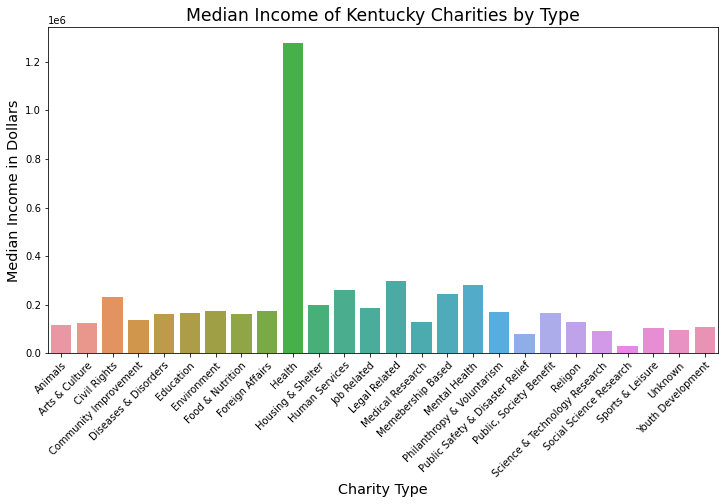

In [417]:
plt.figure(figsize=(12,6))
sns.barplot (x='NTEE_COMMON_CODE', y='Median_Income', data=charities_by_type)
plt.title ("Median Income of Kentucky Charities by Type", fontsize='xx-large')
plt.xlabel ('Charity Type', fontsize='x-large')
plt.ylabel ('Median Income in Dollars', fontsize='x-large')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

Now I want to see if there is any relationship between how many charities are located within a zip code and the average income of the people living within that zipcode. 

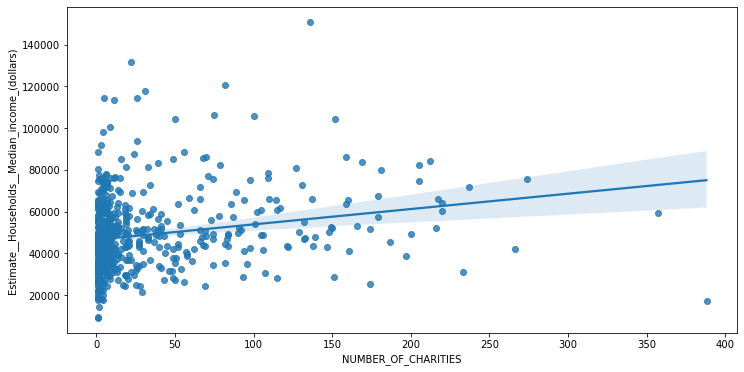

In [419]:
plt.figure(figsize=(12,6))
sns.regplot(x='NUMBER_OF_CHARITIES', y="Estimate__Households__Median_income_(dollars)", data=merged_df)
plt.show()